# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Homework 2:  $k$-NN and Linear Regression 

**Harvard University**<br/>
**Summer 2021**<br/>
**Instructors**: Kevin Rader


<hr style='height:2px'>

---



In [43]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

<hr style="height:2pt">

In [44]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

# <div class="theme"> Predicting Taxi Pickups in NYC </div>

In this homework, we will explore $k$-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York City at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `nyc_taxi.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

## <div class="exercise"> <b> Question 1  [13 pts]</b> </div>

**1.1 [2 pts]**. Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 109 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.

**1.2 [3 pts]**. Generate a scatter plot of the training data points with clear labels on the x and y axes to demonstrate how the number of taxi pickups is related to the time of the day.  Always be sure to title your plot.

**1.3 [4 pts]**. In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result. 

**1.4 [4 pts]**. You should see a *hole* in the scatter plot when `TimeMin` is 500-550 minutes and `PickupCount` is roughly 20-30 pickups.  Briefly speculate why this is the case; use the data to support your claim.


### Answers

**1.1 [2 pts]. Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 109 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.**

In [45]:
# read the file
full_dataset = pd.read_csv('/home/vagrant/2021-s109a/HW-KK/KW2_KK/data/nyc_taxi.csv')
full_dataset.tail()

,TimeMin,PickupCount,Day
1245,635,27,Sat
1246,580,16,Sun
1247,159,5,Mon
1248,45,17,Wed
1249,762,32,Wed


In [46]:
# split the data
train_data, test_data = train_test_split(full_dataset, test_size=0.2, random_state=109)

In [47]:
print("Shape of full dataset is: {0}".format(full_dataset.shape))
print("Shape of training dataset is: {0}".format(train_data.shape))
print("Shape of test dataset is: {0}".format(test_data.shape))

Shape of full dataset is: (1250, 3)
Shape of training dataset is: (1000, 3)
Shape of test dataset is: (250, 3)


**1.2 [3 pts]. Generate a scatter plot of the training data points with clear labels on the x and y axes to demonstrate how the number of taxi pickups is related to the time of the day.  Always be sure to title your plot.**

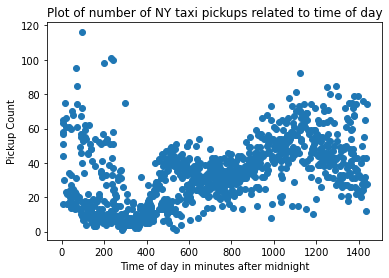

In [48]:
# 1.2

plt.scatter(train_data['TimeMin'], train_data['PickupCount'])
plt.title('Plot of number of NY taxi pickups related to time of day')
plt.xlabel('Time of day in minutes after midnight')
plt.ylabel('Pickup Count')
plt.show()

**1.3 [4 pts]. In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result.**



#### 1.3 
The first visual look at the scatter plot shows that there are generally fewer pickups at night (0-450 minutes/ midnight - 07:30 AM) than later in the day. This makes sense as one would assume less activity in regular sleeping hours. However, there is great variance in the early night hours (0-250 minutes). This may be explained by the events/trends in the night where bigger groups of people tend to require taxi at the same time, such as the closing of restaurants/events. We can also see local peaks in the plot at 8PM and 6PM which makes sence as this is a time one would expect rush traffic.


**1.4 [4 pts]. You should see a *hole* in the scatter plot when `TimeMin` is 500-550 minutes and `PickupCount` is roughly 20-30 pickups.  Briefly speculate why this is the case; use the data to support your claim.**

#### 1.4 Answer:
Between 500-550 minutes refers to the time between ~8:30 - 9:15. In this period we have many instances of low number of pickups as well as many instances of a moderately high number of pickups, but very few instances in the range in between 20-30 pickups. This might be because specific days such as the weekend have stedily low commute in these hours while in the weekdays traffic is higher due to work-commute. This can be investigated with further analysis.

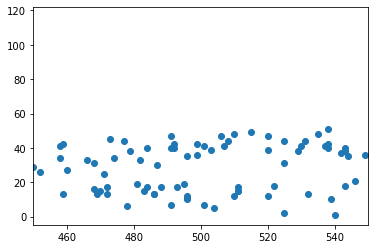

(array([   4,    5,    6,    7,    8,   11,   17,   19,   22,   27,   30,
          33,   34,   38,   40,   42,   43,   44,   45,   47,   51,   52,
          55,   58,   59,   62,   66,   67,   68,   72,   73,   74,   78,
          81,   82,   84,   85,   90,   91,   92,   93,   94,   95,   96,
          98,  101,  102,  107,  108,  111,  112,  115,  116,  118,  122,
         124,  125,  127,  128,  129,  131,  135,  136,  137,  139,  140,
         142,  145,  147,  148,  149,  150,  151,  154,  155,  156,  157,
         158,  159,  160,  161,  163,  165,  167,  174,  176,  177,  178,
         183,  184,  190,  191,  192,  193,  194,  198,  199,  200,  201,
         203,  204,  206,  207,  208,  209,  211,  212,  214,  215,  223,
         227,  229,  230,  231,  232,  234,  235,  238,  239,  240,  241,
         242,  243,  244,  245,  249,  250,  251,  252,  256,  260,  261,
         262,  263,  264,  272,  275,  276,  277,  278,  279,  280,  283,
         284,  287,  288,  290,  298, 

In [49]:
#Quick analysis to check for patterns. Nothing special found without further analysis.
import pylab
plt.scatter(train_data['TimeMin'], train_data['PickupCount'])
pylab.xlim(450, 550)
plt.show()
np.unique(train_data['TimeMin'],return_counts=True)

## <div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen $k$-Nearest Neighbors ($k$-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run $k$-NN Regression. 


**2.1 [4 pts]**. Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels` that will be used to predict `PickupCount` based on `TimeMin`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2 [6 pts]**.  For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 7 x 2 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3 [3 pts]**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4 [3 pts]**. Plot, in a single figure, the two 'curves' of $R^2$ values from the models on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ plots on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5 [9 pts]**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?
6. How would the plots compare if mean square error was used as the metric instead of $R^2$?  

### Answers

**2.1 [4 pts]. Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels` that will be used to predict `PickupCount` based on `TimeMin`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`).**


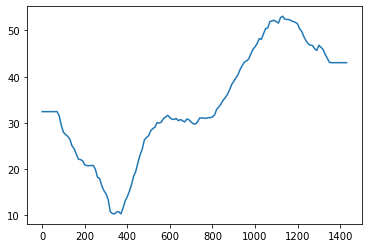

In [51]:
# 2.1

def KNN(k):
    return KNeighborsRegressor(n_neighbors=k).fit(train_data['TimeMin'].values.reshape(-1, 1), train_data['PickupCount'])

x_dummyT = np.arange(0,1440,10)
yhat_dummyT = KNN(100).predict(x_dummyT.reshape(-1, 1))
plt.plot(x_dummyT,yhat_dummyT);
# Slett alt herifra i ruten: !!
keys = [1,10,75,250,500,750,1000]
# KNNs = [KNN(k) for k in keys]
# keys = [str(1),str(10),str(75),str(250),str(500),str(750),str(1000)]



In [52]:

#Skal det være string under her eller ikke?
KNNModels = {
 '1': KNN(1),
 '10': KNN(10),
 '75': KNN(75),
 '250': KNN(250),
 '500': KNN(500),
 '750': KNN(750),
 '1000': KNN(1000)}
KNNModels

{'1': KNeighborsRegressor(n_neighbors=1),
 '10': KNeighborsRegressor(n_neighbors=10),
 '75': KNeighborsRegressor(n_neighbors=75),
 '250': KNeighborsRegressor(n_neighbors=250),
 '500': KNeighborsRegressor(n_neighbors=500),
 '750': KNeighborsRegressor(n_neighbors=750),
 '1000': KNeighborsRegressor(n_neighbors=1000)}


**2.2 [5 pts].  For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set with a line plot of predictions for `PickupCount` vs  a dummy `TimeMin` using `np.arange(np.min(train['TimeMin']),np.max(train['TimeMin']),1)`.  Do the same for the test set in separate plots.  You should have one figure with 7 x 2 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set.** 

**Hints**:
1. Each subplot should use different color to distinguish k-NN regression prediction curve from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  

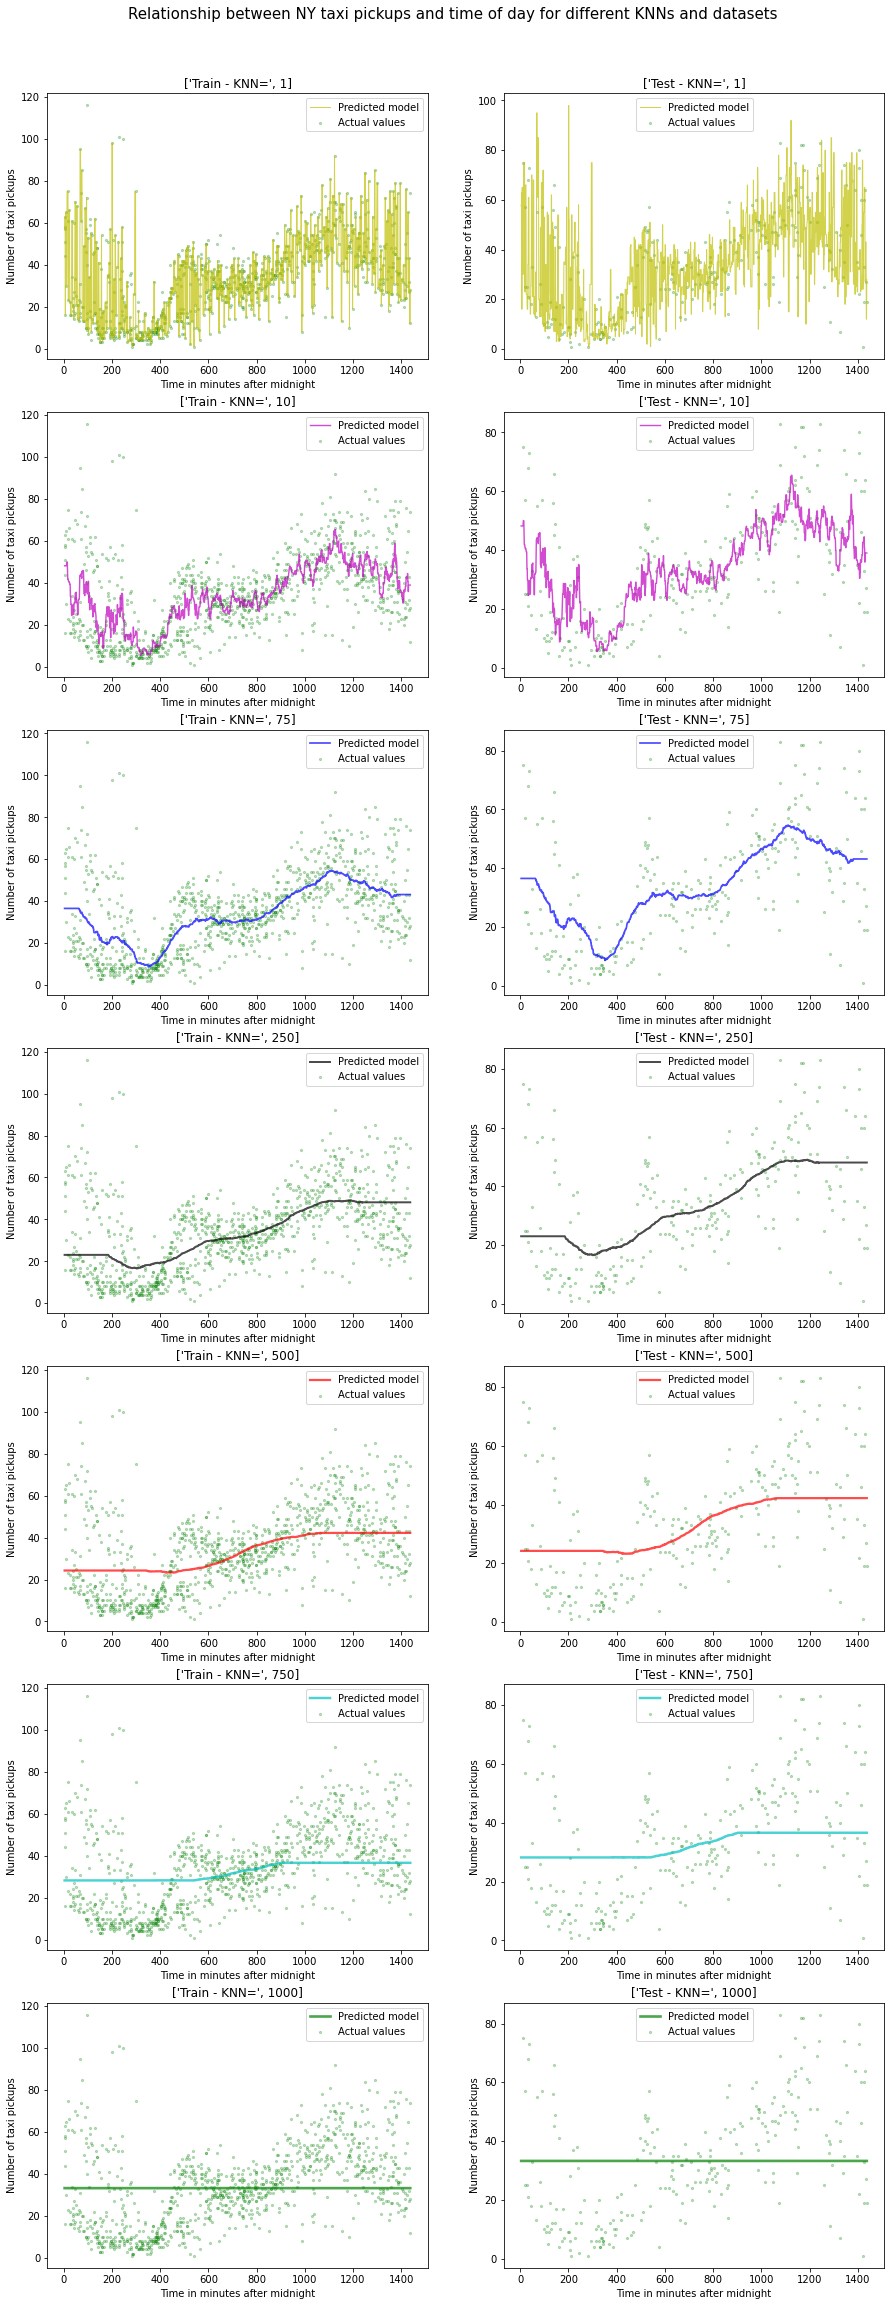

In [272]:
# Plot predictions vs actual
# 2.2
fig, ax = plt.subplots(nrows=7, ncols=2,figsize=(15, 40))
fig.suptitle('Relationship between NY taxi pickups and time of day for different KNNs and datasets', fontsize=15, y=0.91)

TimeMin = np.arange(np.min(train_data['TimeMin']),np.max(train_data['TimeMin']),1)
# def yhat_dummy(k):
#     return KNN(k).predict(TimeMin.reshape(-1, 1))

keys = [1,10,75,250,500,750,1000]
colors = ['y', 'm', 'b', 'k', 'r', 'c', 'g']

for i in range(7):
    ax[i,0].scatter(train_data['TimeMin'],train_data['PickupCount'], s=5, alpha=0.25, color='g', label="Actual values")
    ax[i,0].plot(TimeMin, KNN(keys[i]).predict(TimeMin.reshape(-1, 1)), lw=(i+1)**0.5, color=colors[i], alpha=0.7, label="Predicted model")
    ax[i,0].set_xlabel('Time in minutes after midnight')
    ax[i,0].set_ylabel('Number of taxi pickups')
    ax[i,0].set_title(['Train - KNN=',keys[i]]) #fiks formattering
    ax[i,0].legend()

for i in range(7):
    ax[i,1].scatter(test_data['TimeMin'],test_data['PickupCount'], s=5, alpha=0.25, color='g', label="Actual values")
    ax[i,1].plot(TimeMin, KNN(keys[i]).predict(TimeMin.reshape(-1, 1)), lw=(i+1)**0.5, color=colors[i], alpha=0.7, label="Predicted model")
    ax[i,1].set_xlabel('Time in minutes after midnight')
    ax[i,1].set_ylabel('Number of taxi pickups')
    ax[i,1].set_title(['Test - KNN=',keys[i]]) #fiks formattering
    ax[i,1].legend()
plt.show();

**2.3 [3 pts]. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).**



In [56]:
#2.3

# keys = [1,10,75,250,500,750,1000]
R2_table = pd.DataFrame({'R2_Train': [KNN(keys[i]).score(train_data['TimeMin'].values.reshape(-1, 1), train_data['PickupCount']) for i in range(7)],
                   'R2_Test': [KNN(keys[i]).score(test_data['TimeMin'].values.reshape(-1, 1), test_data['PickupCount']) for i in range(7)]},
                  index=[keys[i] for i in range(7)])
print("This table shows the overview of R² per value of k-NN for the train and test dataset")
R2_table

This table shows the overview of R² per value of k-NN for the train and test dataset


,R2_Train,R2_Test
1,0.667533,-0.074464
10,0.469673,0.414593
75,0.418806,0.479658
250,0.343803,0.394991
500,0.276392,0.302357
750,0.169987,0.179605
1000,0.000000,-0.000032


In [41]:
#for k=10:
# sk.metrics.mean_squared_error(test_data['TimeMin'], KNN(75).predict(test_data['TimeMin'].reshape(-1, 1)))

**2.4 [3 pts]. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.**  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ plots on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.



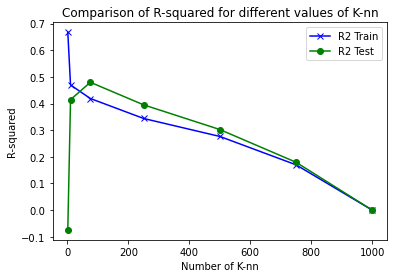

In [58]:
# 2.4
k=keys

plt.plot(k, R2_table.loc[k,"R2_Train"], color='b', marker='x', label="R2 Train")
plt.plot(k, R2_table.loc[k,"R2_Test"], color='g', marker='o', label="R2 Test")
plt.xlabel('Number of K-nn')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared for different values of K-nn')
plt.legend()

plt.show()

**2.5 [9 pts]. Discuss the results:**

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  

        Answer Q1: 
        If k = n in a k-NN regression model that means the model will follow the observations n perfectly. This will lead to overfitting, which one can see the consequences of by comparing the model to the test-data.



2. What does an $R^2$ score of $0$ mean?  

        Answer Q2: 
        An R² score of 0 means that none of the variance in the observations can be explained by the model. In other words you will get the same result by choosing Y-bar (the mean of Y) as your model.

3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?

        Answer Q3: 
        A negative R² score means that your model is doing worse on average compared to using Ybar as your model

4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  

        Answer Q3: 
        Yes, they exhibit different trends. The trend of the training data set is continuously decreasing, as a higher k-NN leads to a line that is less fitted to the observations, and therefore is less likely to explain the variance of the observations. 
        The trend of the test data set starts off with a very low R², as one can expect when k_NN=1 and we have overfitting. The curve increases until k-NN = 75, and starts decreasing similarly to the train-set after this.

5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?

        Answer Q3: 
        As mentioned above, the model that has the greatest test-set R² is with k = 75. Therefore, this is the best model amongst our alternatives. The corresponding train-set R² for k-NN=75 is actually a bit lower than in our test-set which can happen. 

6. How would the plots compare if mean square error was used as the metric instead of $R^2$?  

        Answer Q3: k=75 would still be the best choise of model if we were using MSE as deciding metric.
        
        
        

## <div class="exercise"> <b> Question 3 [23 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1 [3 pts]**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create an `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2 [3 pts]**. Create a plot just like you did in 2.2 (but with fewer subplots): plot both the observed values and the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3 [2 pts]**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4 [2 pts]**. Report the estimates for the slope and intercept for the fitted linear model.

**3.5 [3 pts]**. Report the $95\%$ confidence intervals (CIs) for the slope and intercept.  

**3.6 [10 pts]**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 
4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  
5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?


### Answers



**3.1 [3 pts]. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create an `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.**



In [62]:
# 3.1:

# I first create the X matrix by appending a column of ones to the data
X_train = sm.add_constant(train_data['TimeMin'])
X_test = sm.add_constant(test_data['TimeMin'])
# build the OLS model from the training data
OLSModel = sm.OLS(train_data['PickupCount'], X_train).fit()

# OLSModel.params
# OLSModel.summary()

**3.2 [3 pts]. Create a plot just like you did in 2.2 (but with fewer subplots): plot both the observed values and the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.**

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  



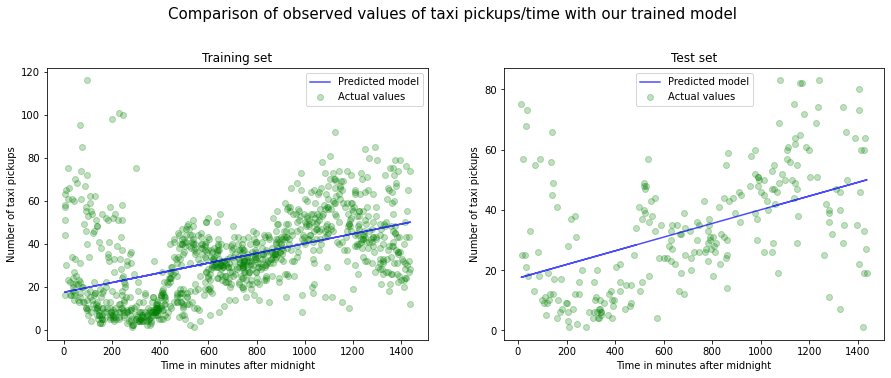

In [269]:
# 3.2:

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
fig.suptitle('Comparison of observed values of taxi pickups/time with our trained model', fontsize=15, y=1.05)

OLSModel = sm.OLS(train_data['PickupCount'], X_train).fit()

ax[0].scatter(train_data['TimeMin'],train_data['PickupCount'], alpha=0.25, color='g', label="Actual values")
ax[0].plot(train_data['TimeMin'], OLSModel.predict(X_train),      color='b', alpha=0.7, label="Predicted model")
ax[0].set_xlabel('Time in minutes after midnight')
ax[0].set_ylabel('Number of taxi pickups')
ax[0].legend()
ax[0].set_title('Training set')

ax[1].scatter(test_data['TimeMin'],test_data['PickupCount'], alpha=0.25, color='g', label="Actual values")
ax[1].plot(test_data['TimeMin'], OLSModel.predict(X_test),      color='b', alpha=0.7, label="Predicted model")
ax[1].set_xlabel('Time in minutes after midnight')
ax[1].set_ylabel('Number of taxi pickups')
ax[1].legend()
ax[1].set_title('Test set')

plt.show()


**3.3 [2 pts]**. Report the $R^2$ score for the fitted model on both the training and test sets.



In [66]:
# 3.3

R2_train = sk.metrics.r2_score(train_data['PickupCount'],OLSModel.predict(X_train))
R2_test = sk.metrics.r2_score(test_data['PickupCount'],OLSModel.predict(X_test))

print("The R² score for our training set is",R2_train)
print("The R² score for our test set is",R2_test)

The R² score for our training set is 0.23457707344420808
The R² score for our test set is 0.27091642393405146


**3.4 [2 pts]. Report the estimates for the slope and intercept for the fitted linear model.**



In [67]:
# 3.4:

beta0 = OLSModel.params[0]
beta1 = OLSModel.params[1]
print("The estimate for the intercept of the fitted linear model is",beta0)
print("The estimate for the slope of the fitted linear model is",beta1)

The estimate for the intercept of the fitted linear model is 17.341909774869503
The estimate for the slope of the fitted linear model is 0.022715493625008028


**3.5 [3 pts]. Report the $95\%$ confidence intervals (CIs) for the slope and intercept.** 



In [69]:
# 3.5:

OLSModel.summary()
print("Confidence interval for the intercept= [15.282, 19.402]")
print("Confidence interval for the slope= [0.020, 0.025]")
OLSModel.summary()

Confidence interval for the intercept= [15.282, 19.402]
Confidence interval for the slope= [0.020, 0.025]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     305.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           6.06e-60
Time:                        10:44:40   Log-Likelihood:                -4225.3
No. Observations:                1000   AIC:                             8455.
Df Residuals:                     998   BIC:                             8464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3419      1.050     16.519      0.000      15.282      19.402
TimeMin        0.0227      0.001     17.489      0.000       0.020       0.025
==============================================================================
Omnibus:                      231.966   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.753
Skew:                           1.202   Prob(JB):                    3.53e-131
Kurtosis:                       5.939   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.6 [10 pts]. Discuss the results:**

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.

 ####     Answer Q1: 
        - The R² score for our OLS test set is 0.2709
        - The R² score for out k-NN(k=75) model is 0.4797
        By looking at the distribution of our data it is not a surprise that a k-NN model leads to a better fit. We can see clear movements in the data set that shows the relationship is not strictly linear, and our k-NN model is following these movements to describe the pattern in the data better than what a linear model can achieve.  

2. What does the sign of the slope of the fitted linear model convey about the data?  

 ####     Answer Q2:
        - The estimate for the slope of the fitted linear model is positive (0.0227). This tells us that the number of taxi pickups in NY is higher, on average, the later in the day it is (new day starting at midnight).

3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 

 ####     Answer Q3:
        - The 95% CI for our Beta1= [0.020, 0.025] shows that the slope of the model is statistically significant. Even though the numbers might not seem high at first glance, the interval is not close to containing 0 and the relationship is therefore significant.

4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  

 ####     Answer Q4:
        - The 99% CIs for the slope and intercept would be wider than the CIs at 95%, while the midpoints would be similar. This is because the 99% CIs should include a higher portion of the variance in both directions from the estimated coefficients.

5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?

 ####    Answer Q5:
        - Both TimeMin=0 and TimeMin=1440 refers to the time 00:00. Therefore the outcome of the model should be the same in these two points. However, we see that the model has significantly different predictions at TimeMin=0 and TimeMin=1440. This is a flaw with having a linear model in this situation, when the y-value is actually decreasing at the end of the day, moving back towards the startingpoint we can see at the beginning of the day.  


## <div class="exercise"> <b> Question 4 [12 pts] </b></div>

We next consider investigating how the day of the week is associated with pickups to improve both the predictive accuracy of the models and help with more in depth interpretations.  We begin by using the non-parametric *k*-NN approach.   

**4.1 [2 pts]**. Create a binary variable `Weekend` that indicates whether `Day` is either Saturday or Sunday. 

**4.2 [3 pts]**. Build a 'multiple' $k$-NN regression model to predict `PickupCount` as a function of `TimeMin` and `Weekend`.  Use the $k$ you chose as the best from problem 2.5.  Hint/suggestion: if you want to force the nearest neighbors to be within a subgroup (weekend vs. weekday), then you can inflate the binary indicator by mutiplying it by a number larger than the range of `TimeMin`.

**4.3 [3 pts]**. Plot the predictions of your $k$-NN regression model against `TimeMin` for the 2 types of days on the same plot: weekends and weekdays (overlay these on top of the scatterplot). 

**4.4 [4 pts]**. Describe any differences you observe between weekends and weekdays and why these make sense or are surprising.






### Answers


**4.1 [2 pts]. Create a binary variable `Weekend` that indicates whether `Day` is either Saturday or Sunday.** 



In [240]:
# 4.1:

weekend = []
for row in train_data['Day']:
    if row == 'Sat' or row == 'Sun':
        weekend.append(1)
    else:
        weekend.append(0)
train_data['Weekend'] = weekend



import warnings
warnings.filterwarnings('ignore')

train_data.head(10)

,TimeMin,PickupCount,Day,Weekend,Weekend_inflated
346,749,32,Wed,0,0
1027,244,9,Fri,0,0
126,745,19,Mon,0,0
814,1177,54,Mon,0,0
908,833,43,Thu,0,0
752,1388,36,Sat,1,1500
610,1215,39,Thu,0,0
823,810,21,Tue,0,0
1047,432,21,Thu,0,0
316,934,42,Tue,0,0


**4.2 [3 pts]**. Build a 'multiple' $k$-NN regression model to predict `PickupCount` as a function of `TimeMin` and `Weekend`.  Use the $k$ you chose as the best from problem 2.5.  Hint/suggestion: if you want to force the nearest neighbors to be within a subgroup (weekend vs. weekday), then you can inflate the binary indicator by mutiplying it by a number larger than the range of `TimeMin`.


In [241]:
# 4.2:
train_data['Weekend_inflated'] = train_data['Weekend']*1500

knn75Weekend =KNeighborsRegressor(n_neighbors=75).fit(train_data[['Weekend_inflated','TimeMin']],train_data['PickupCount'])
print('knn75Weekend is my multiple k-NN regression model')

knn75Weekend is my multiple k-NN regression model


**4.3 [3 pts]. Plot the predictions of your $k$-NN regression model against `TimeMin` for the 2 types of days on the same plot: weekends and weekdays (overlay these on top of the scatterplot).**


In [242]:
# 4.3:

# First I create dummy variables that our predicted model will be plotted against:
TimeMin_dummy = np.arange(0,1440)
dummy_weekend = sm.add_constant(TimeMin_dummy)
dummy_weekend[:,0] = dummy_weekend[:,0]*1500

dummy_regday = sm.add_constant(TimeMin_dummy)
dummy_regday[:,0] = dummy_regday[:,0]*0

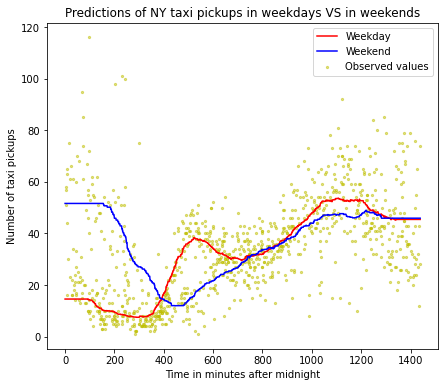

In [268]:
# 4.3:

y_regdays = knn75Weekend.predict(dummy_regday)
y_weekend = knn75Weekend.predict(dummy_weekend)
plt.figure(figsize=(7,6))
plt.scatter(train_data['TimeMin'],train_data['PickupCount'], color='y', s=5 ,alpha=0.5, label='Observed values')
plt.plot(TimeMin_dummy, knn75Weekend.predict(dummy_regday), color='r', label='Weekday')
plt.plot(TimeMin_dummy, knn75Weekend.predict(dummy_weekend), color='b', label='Weekend')
plt.xlabel('Time in minutes after midnight')
plt.ylabel('Number of taxi pickups')
plt.title('Predictions of NY taxi pickups in weekdays VS in weekends')
plt.legend()
plt.show()


**4.4 [4 pts]. Describe any differences you observe between weekends and weekdays and why these make sense or are surprising.**


#### Answer 4.4:

The plot shows that on weekdays the lowest number of taxi pickups is around TimeMin=450: 07:30 AM. In contrast we see that the plot for weekdays has a peak around 8-9 AM. This is expected as there will be more commute to e.g. work in the weekdays than in the weekends (This confirms my guess about the hole in the graph from earlier).   
Similarly we see that the number of taxi pickups during night is a lot higher in the weekends than during the weekdays, as one would expect because there is more night life in the weekends.   
Finally we see a difference in the graphs in the area between 1000 and 1200 minutes (16:00 - 20:00). This is probably mainly a result of people commuting home from work (could include other activities, but those are often also relevant in the weekend).

##### <div class="exercise"> <b> Question 5 [27 pts] </b></div>

Finally we turn to multiple regression models to see if there is a weekend affect.  Note: Use sklearn to do the modeling unless otherwise stated.


**5.1 [6 pts]**. Fit a multiple regression model using statsmodels to predict `PickupCount` as a function of `TimeMin` and `Weekend` (no interaction term).  Answer the following questions in the context of this model:

1. Interpret the estimated $\beta$ coefficients associated with the two predictors. 

2. Report the 95% confidence intervals and perform formal hypothesis tests to determine whether the associations are significant.

**5.2 [6 pts]**. Fit polynomial regression models to predict `PickupCount` as a function of `TimeMin` for polynomials of 2,3,4,5, and 6.  Determine which of these 5 models performs best at predicting `PickupCount` on the test set.

**5.3 [3 pts]**. Create a multiple regression model with `Weekend`, the best polynomial order of `TimeMin` from the previous part, and the interactions between `Weekend` and all the polynomial terms for `TimeMin`.

**5.4 [4 pts]**. Determine if the model in 5.3 is a more accurate model than the *k*-NN model in 4.2.  Why do you suppose this is the case?

**5.5 [5 pts]**. Plot the predictions of your interaction model from 5.4 against `TimeMin` for the 2 types of days: weekends and weekdays (overlay this on top of the scatterplot of the training data). How does this compare to the plot from 4.3?

**5.6 [3 pts]**. Suggest an additional feature that could improve the predictive ability of the models considered so far (either included or not in the provided data set) and explain why this should help.  Note: this is very open ended and there is not a single correct answer.

### Answers

**5.1 [6 pts]. Fit a multiple regression model using statsmodels to predict `PickupCount` as a function of `TimeMin` and `Weekend` (no interaction term).  Answer the following questions in the context of this model:**

1. Interpret the estimated $\beta$ coefficients associated with the two predictors. 

2. Report the 95% confidence intervals and perform formal hypothesis tests to determine whether the associations are significant.


In [301]:
# 5.1:

# I first create the X matrix by appending a column of ones to the data
X = train_data[['Weekend', 'TimeMin']]
X = sm.add_constant(X)

In [309]:
# build the OLS model from the training data
OLSModel_multiple = sm.OLS(train_data['PickupCount'], X).fit()

OLSModel_multiple.params
OLSModel_multiple.summary();

#### Answer 1:
* Beta0 = 15.7475 and is our intercept, showing that when Weekend=0 and TimeMin=0, PickupCount is estimated to be ~15.7.
* Beta1(Weekend) = 4.6383 and shows the estimate for how the much higher taxi pickups per time are on average in the weekend than on weekdays, while all other variables are held constant.
* Beta2(TimeMin) = 0.228 is our relationship between time and pickups(holding other variables constant). This is similar to the 0.227 we had in linear OLS regression (without accounting for weekdays).

#### Answer 2:
###### Confidence intervals are:
* Intercept = [13.574 	17.921]
* Beta1(weekend) = [2.483 	6.793]
* Beta2(TimeMin) = [0.020 	0.025]

###### Formal hypothesis test:
- 

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
fig.suptitle('Comparison of observed values of taxi pickups/time with our trained model', fontsize=15, y=1.05)

OLSModel = sm.OLS(train_data['PickupCount'], X_train).fit()

ax[0].scatter(train_data['TimeMin'],train_data['PickupCount'], alpha=0.25, color='g', label="Actual values")
ax[0].plot(train_data['TimeMin'], OLSModel.predict(X_train),      color='b', alpha=0.7, label="Predicted model")
ax[0].set_xlabel('Time in minutes after midnight')
ax[0].set_ylabel('Number of taxi pickups')
ax[0].legend()
ax[0].set_title('Training set')

ax[1].scatter(test_data['TimeMin'],test_data['PickupCount'], alpha=0.25, color='g', label="Actual values")
ax[1].plot(test_data['TimeMin'], OLSModel.predict(X_test),      color='b', alpha=0.7, label="Predicted model")
ax[1].set_xlabel('Time in minutes after midnight')
ax[1].set_ylabel('Number of taxi pickups')
ax[1].legend()
ax[1].set_title('Test set')

plt.show()

*your answer here*


**5.2 [6 pts]. Fit polynomial regression models to predict `PickupCount` as a function of `TimeMin` for polynomials of 2,3,4,5, and 6.  Determine which of these 5 models performs best at predicting `PickupCount` on the test set.**



In [ ]:
# your code here

**5.3 [3 pts]. Create a multiple regression model with `Weekend`, the best polynomial order of `TimeMin` from the previous part, and the interactions between `Weekend` and all the polynomial terms for `TimeMin`.**


In [ ]:
# your code here


**5.4 [4 pts]. Determine if the model in 5.3 is a more predictive model than the *k*-NN model in 4.2.  Why do you suppose this is the case?**



In [ ]:
# your code here

*your answer here*

**5.5 [5 pts]. Plot the predictions of your interaction model from 5.4 against `TimeMin` for the 2 types of days: weekends and weekdays (overlay this on top of the scatterplot). How does this compare to the plot from 4.3?**



In [ ]:
# your code here

*your answer here*

**5.6 [3 pts]. Suggest an additional feature that could improve the predictive ability of the models considered so far (either included or not in the provided data set) and explain why this should help.  Note: this is very open ended and there is not a single correct answer.**

*your answer here*